## MANOVA example in Python


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import statsmodels.multivariate.manova as manova 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('MANOVA_example.csv')

In [3]:
print(df.head(),'\n')
print(df.dtypes)

   Method   Test  Satisfaction
0       1  3.000         3.001
1       1  2.990         2.994
2       1  3.041         3.032
3       1  3.063         3.059
4       1  3.035         3.026 

Method            int64
Test            float64
Satisfaction    float64
dtype: object


In [4]:
print(df['Method'].unique())

[1 2 3]


In [5]:
groups = df.groupby('Method')
groupa = groups.get_group(1)
groupb = groups.get_group(2)
groupc = groups.get_group(3)

In [6]:
des = pd.concat([groupa[['Test','Satisfaction']].describe().T, groupb[['Test','Satisfaction']].describe().T, groupc[['Test','Satisfaction']].describe().T], 
                 keys=['Method 1', 'Method 2', 'Method 3'])
print(des)

                       count      mean       std    min      25%     50%  \
Method 1 Test           16.0  3.019312  0.018973  2.990  3.00675  3.0165   
         Satisfaction   16.0  3.015125  0.016661  2.994  3.00300  3.0105   
Method 2 Test           16.0  3.020437  0.015891  2.997  3.00975  3.0150   
         Satisfaction   16.0  3.013313  0.016600  2.993  3.00275  3.0065   
Method 3 Test           16.0  3.027813  0.010540  3.007  3.02250  3.0270   
         Satisfaction   16.0  3.013125  0.013266  2.985  3.00425  3.0135   

                           75%    max  
Method 1 Test          3.03275  3.063  
         Satisfaction  3.02525  3.059  
Method 2 Test          3.03375  3.050  
         Satisfaction  3.02400  3.045  
Method 3 Test          3.03225  3.048  
         Satisfaction  3.02050  3.036  


Looking at the following Graphs can conclude there 

<AxesSubplot:xlabel='Method', ylabel='Test'>

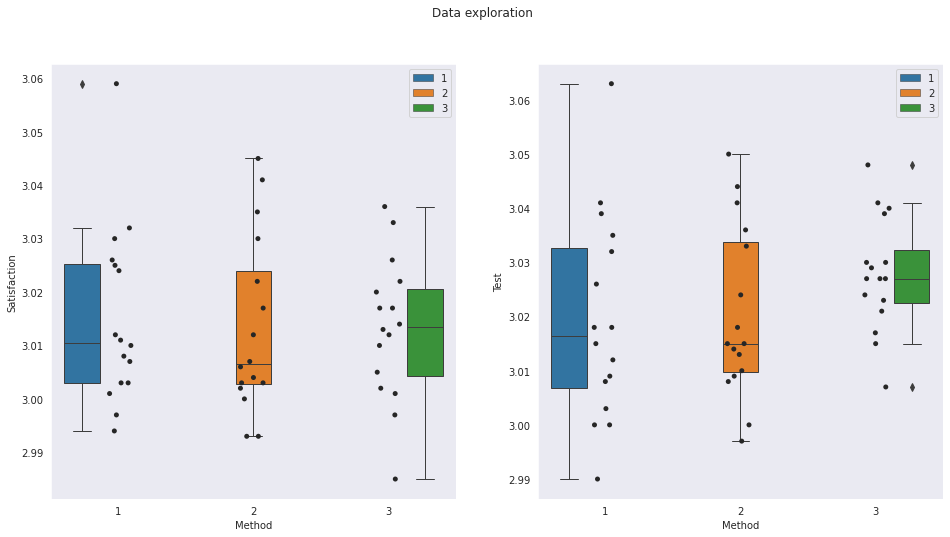

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Data exploration')

sns.boxplot(ax=ax[0], data=df, x='Method', y='Satisfaction', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[0], data=df, x='Method', y='Satisfaction', color=".15")


sns.boxplot(ax=ax[1], data=df, x='Method', y='Test', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[1], data=df, x='Method', y='Test', color=".15")

<AxesSubplot:xlabel='Satisfaction', ylabel='Test'>

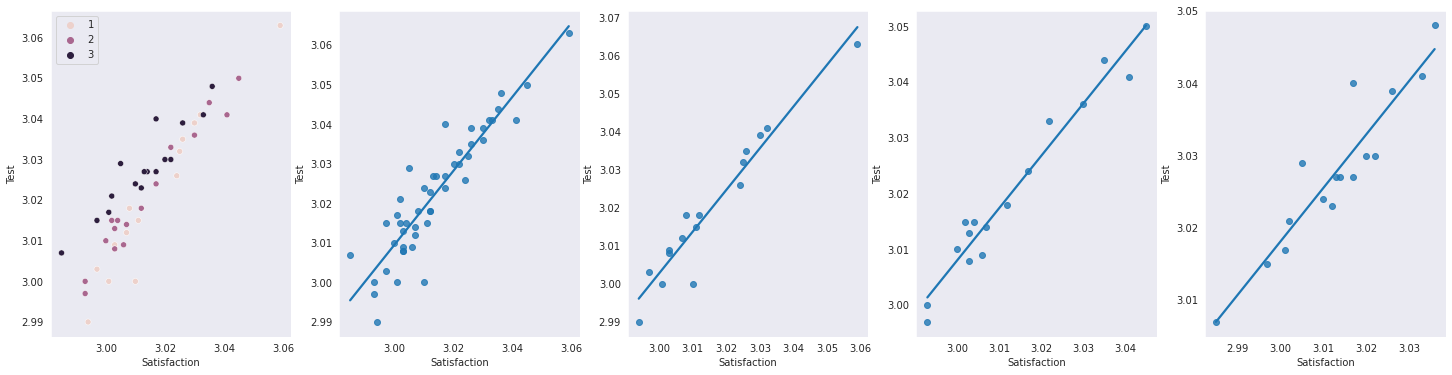

In [8]:
fig, ax = plt.subplots(1,5, figsize=(25,6))
sns.scatterplot(ax=ax[0], data=df, x='Satisfaction', y='Test', hue=df['Method'].tolist())
sns.regplot(ax=ax[1], data=df, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[2], data=groupa, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[3], data=groupb, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[4], data=groupc, x='Satisfaction', y='Test', ci=False)

In [9]:
fit = manova.MANOVA.from_formula('Test + Satisfaction ~ Method', data=df)
fitted_model = fit.mv_test()

In [10]:
print(fitted_model)

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda    0.0002 2.0000 45.0000 131226.2913 0.0000
         Pillai's trace    0.9998 2.0000 45.0000 131226.2913 0.0000
 Hotelling-Lawley trace 5832.2796 2.0000 45.0000 131226.2913 0.0000
    Roy's greatest root 5832.2796 2.0000 45.0000 131226.2913 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
            Method          Value   Num DF   Den DF  F Value  Pr > F
--------------------------------------------------------------------
             Wilks' lambda  0.5423  2.0000  45.0000  18.9867  0.00

In [11]:
print('ANOVA TABLE for Test and Teaching method\n', sm.stats.anova_lm(ols('Method ~ Test', data=df).fit(), typ=1))
print('\nANOVA TABLE for Satisfaction and Teaching method\n', sm.stats.anova_lm(ols('Method ~ Satisfaction', data=df).fit(), typ=1))


ANOVA TABLE for Test and Teaching method
             df     sum_sq   mean_sq        F    PR(>F)
Test       1.0   1.603332  1.603332  2.42636  0.126164
Residual  46.0  30.396668  0.660797      NaN       NaN

ANOVA TABLE for Satisfaction and Teaching method
                 df     sum_sq   mean_sq         F   PR(>F)
Satisfaction   1.0   0.093295  0.093295  0.134503  0.71549
Residual      46.0  31.906705  0.693624       NaN      NaN


In [12]:
x = df[['Test', 'Satisfaction']]
y = df['Method']
post_hoc = lda().fit(X=x, y=y)

In [13]:
print(post_hoc.priors_,'\n')
print(post_hoc.scalings_,'\n')
print(post_hoc.means_,'\n')
print(post_hoc.explained_variance_ratio_)

[0.33333333 0.33333333 0.33333333] 

[[-215.04596693  -10.13601837]
 [ 207.44096018  -54.43799805]] 

[[3.0193125 3.015125 ]
 [3.0204375 3.0133125]
 [3.0278125 3.013125 ]] 

[0.99847505 0.00152495]


<AxesSubplot:xlabel='lda1', ylabel='lda2'>

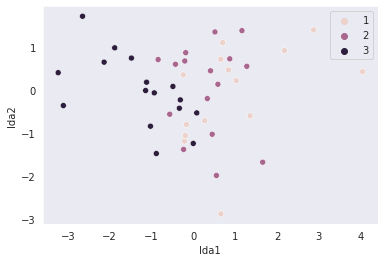

In [14]:
plotting_x = pd.DataFrame(lda().fit(X=x, y=y).transform(x), columns=['lda1', 'lda2']) 
plotting_x['Method'] = df['Method']
sns.scatterplot(data=plotting_x, x='lda1', y='lda2', hue=df['Method'].tolist())